In [54]:
import numpy as np
from sklearn.linear_model import LinearRegression

def get_decomposition(recommendation_elo_scores: dict, feature_elo_scores: dict, hotel_names: list):
        # We need to get the elo scores.
        # Sort the feature elo scores alphabetically. Then convert to a numpy array. And then use collumn stack. 

        raw_elo_scores = []   
        
        # Prepearing the elo score dict to be stacked.   
        for elo_score_tuples in feature_elo_scores.values():
            sorted_elo_score_tuples = sorted(elo_score_tuples, key=lambda x: x[1])

            print(sorted_elo_score_tuples)
            sorted_elo_score = [x[0] for x in sorted_elo_score_tuples]
            raw_elo_scores.append(sorted_elo_score)

        X_regressors = np.column_stack(raw_elo_scores)

        # Getting the corresponding y values.         
        Y_values = [x[0] for x in sorted(recommendation_elo_scores, key=lambda x: x[1])]

        # Fitting the linear regression model.
        reg = LinearRegression().fit(X_regressors, Y_values)
        
        # Now we will get return the covariate feature pairs. 
        print('The score from this regression is', reg.score(X_regressors, Y_values))
        return list(zip(feature_elo_scores.keys(), reg.coef_))

As we cannot have sklearn and openai it seems we will resort to running them in different kernels. We just need to get the scores 

In [1]:
master_prompt = 'Which hotel do you recommend more {} or {}, on the basis of {}? State the name of the hotel you prefer only and nothing else. '

features = ['value for money', 'luxury', 'location', 'food', 'being close to the beach']

# I have removed the shard as it is the same as the shangri.
pairwise_words = ['The Savoy', 'The Langham', 'The Ritz', 'The Ned', 'Claridges', 'The Shangri', 'The Dorchester'] 

In [45]:
import pickle 

recomendation_elo_scores = [(2.6741629983024118, 'The Ritz'), (1.2011782279982344, 'The Savoy'), (0.6324022829819813, 'The Dorchester'), (0.5710428409098807, 'The Langham'), (-0.5732856334090939, 'The Ned'), (-0.7661857400225411, 'Claridges'), (-2.0441528233787087, 'The Shangri')]

with open(fr'.\pickles\elo_scores_london_test_run.pkl', 'rb') as file:
    feature_elo_scores =  pickle.load(file)

reduced_features = {feature : feature_elo_scores[feature] for feature in ['being close to the beach'] }

In [46]:
print([x[1] for x in feature_elo_scores['location']])
print([x[1] for x in feature_elo_scores['value for money']])


['Claridges', 'The Shangri', 'The Langham', 'The Dorchester', 'The Ritz', 'The Savoy', 'The Ned']
['The Savoy', 'The Ritz', 'Claridges', 'The Dorchester', 'The Shangri', 'The Langham', 'The Ned']


# Worried about overfitting so will slice the feature elo to less features. 

reduced_features = {feature}

In [55]:
feature_decomposition = get_decomposition(recomendation_elo_scores, feature_elo_scores, pairwise_words)
reduced_decomposition = get_decomposition(recomendation_elo_scores, reduced_features, pairwise_words)

The score from this regression is 0.9895812387060444
The score from this regression is 0.08760717893655645


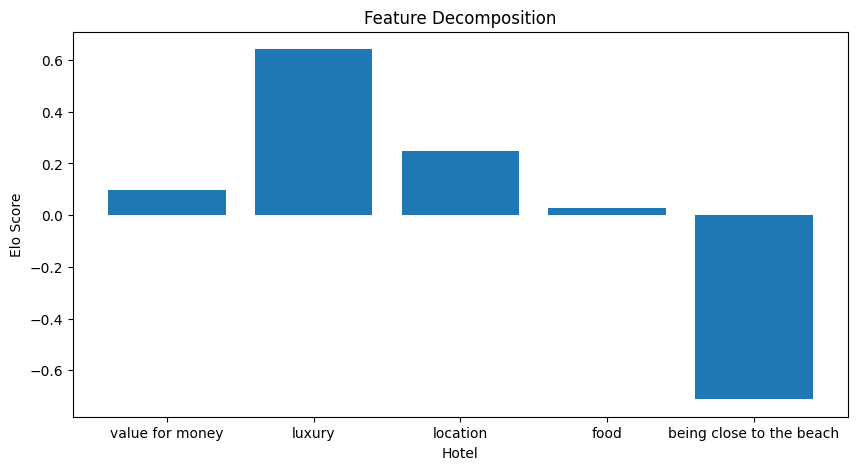

In [48]:
import matplotlib.pyplot as plt

# Extracting the hotel names and elo scores from feature_decomposition
hotel_names, elo_scores = zip(*feature_decomposition)

# Creating a bar chart
plt.figure(figsize=(10, 5))
plt.bar(hotel_names, elo_scores)
plt.xlabel('Hotel')
plt.ylabel('Elo Score')
plt.title('Feature Decomposition')
plt.show()

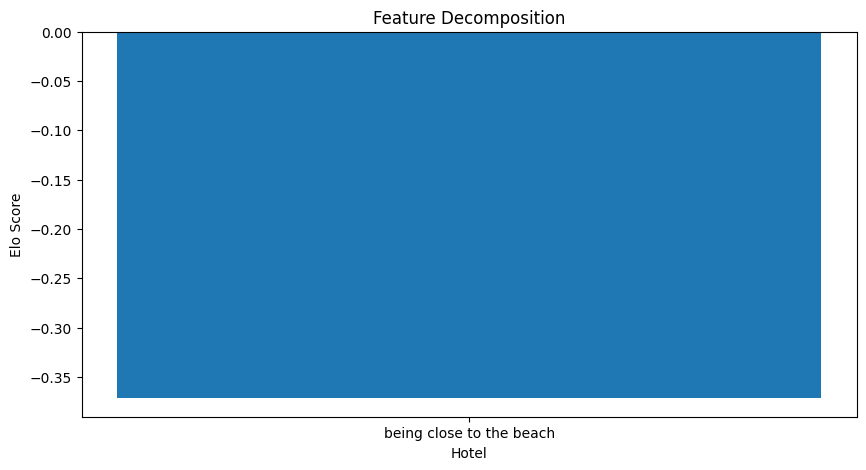

In [49]:
import matplotlib.pyplot as plt

# Extracting the hotel names and elo scores from feature_decomposition
hotel_names, elo_scores = zip(*reduced_decomposition)

# Creating a bar chart
plt.figure(figsize=(10, 5))
plt.bar(hotel_names, elo_scores)
plt.xlabel('Hotel')
plt.ylabel('Elo Score')
plt.title('Feature Decomposition')
plt.show()

## What would we expect to see if this technique was good?

The decomposition would weight unsensible features close to zero. 

As you have about five hotels and only about five features recently it could easily be overfit. 

You should do an experiment with more hotels, and then same number of features and see what happen then 

In [58]:
extended_recomendation_elo_scores = [(1.9152842580274017, 'Mandarin Oriental Hyde Park'), (1.4223614326422596, 'The Ritz'), (1.3125494486294067, 'Four Seasons Hotel London at Ten Trinity Square'), (1.209502088521932, 'The Savoy'), (0.9045510592885859, 'Bulgari Hotel London'), (0.5627220923768743, 'The Langham'), (0.49883754740572056, 'Rosewood London'), (0.3792364766731302, 'The Connaught'), (0.3494275925853742, 'The Dorchester'), (0.15744334829467876, "Claridge's"), (-0.40877271004514837, 'Hotel Café Royal'), (-0.4983874219664184, 'The Berkeley'), (-0.5414184031779996, 'The Shangri-La Hotel at The Shard'), (-0.5718438904242533, 'The Lanesborough'), (-0.9073412945212909, 'The Ned'), (-1.3376780945179425, 'The Goring'), (-4.4464735297923115, "Brown's Hotel")]

with open(fr'.\pickles\elo_scores_london_18_.pkl', 'rb') as file:
    feature_elo_scores =  pickle.load(file)

reduced_features = {feature : feature_elo_scores[feature] for feature in ['being close to the beach'] }

In [64]:
from pprint import pprint
pprint(feature_elo_scores)

{'being close to the beach': [(-2.8775780266495796,
                               'The Shangri-La Hotel at The Shard'),
                              (-0.9969054714687725, 'The Connaught'),
                              (-0.9484389521870352,
                               'Mandarin Oriental Hyde Park'),
                              (-0.43789945061517754, 'The Lanesborough'),
                              (-0.4099040107558628, 'The Ned'),
                              (-0.35656946038210235, "Claridge's"),
                              (-0.3522363965755795, 'The Savoy'),
                              (-0.03573873033707886, 'Bulgari Hotel London'),
                              (0.05027331361165488, 'Rosewood London'),
                              (0.09125551148576905, 'The Goring'),
                              (0.34323214077963027, 'Hotel Café Royal'),
                              (0.3641529238862179, 'The Langham'),
                              (0.38070451127856936, 'The Ritz'),


In [59]:
extended_pairwise_hotels = [
    'The Savoy',
    'The Langham',
    'The Ritz',
    'The Ned',
    'Claridge\'s',
    'The Shangri-La Hotel at The Shard',
    'The Dorchester',
    'The Connaught',
    'The Berkeley',
    'Brown\'s Hotel',
    'Four Seasons Hotel London at Ten Trinity Square',
    'The Lanesborough',
    'Rosewood London',
    'Mandarin Oriental Hyde Park',
    'The Goring',
    'Hotel Café Royal',
    'Bulgari Hotel London',
]

In [65]:
luxury_dropped = feature_elo_scores.copy()
luxury_dropped.pop('luxury')

[(-16.554843143962866, "Brown's Hotel"), (-9.646087406610445, 'The Ned'), (-2.339065224572871, 'The Goring'), (-2.1672592245456483, 'Hotel Café Royal'), (-1.6961694713514222, 'The Berkeley'), (-1.3306164844305277, 'The Connaught'), (0.021869618844347904, 'The Langham'), (0.27592391907795655, "Claridge's"), (1.1055684518844942, 'Rosewood London'), (1.7526824304602595, 'Four Seasons Hotel London at Ten Trinity Square'), (2.279334997313242, 'The Shangri-La Hotel at The Shard'), (2.436415838876001, 'The Savoy'), (2.6723919347457423, 'The Lanesborough'), (2.979965672175778, 'The Dorchester'), (4.821152319556727, 'The Ritz'), (5.282277513559105, 'Mandarin Oriental Hyde Park'), (10.10645825898013, 'Bulgari Hotel London')]

In [66]:
extended_feature_decomposition = get_decomposition(extended_recomendation_elo_scores, luxury_dropped, extended_pairwise_hotels)

The score from this regression is 0.42019130429132745


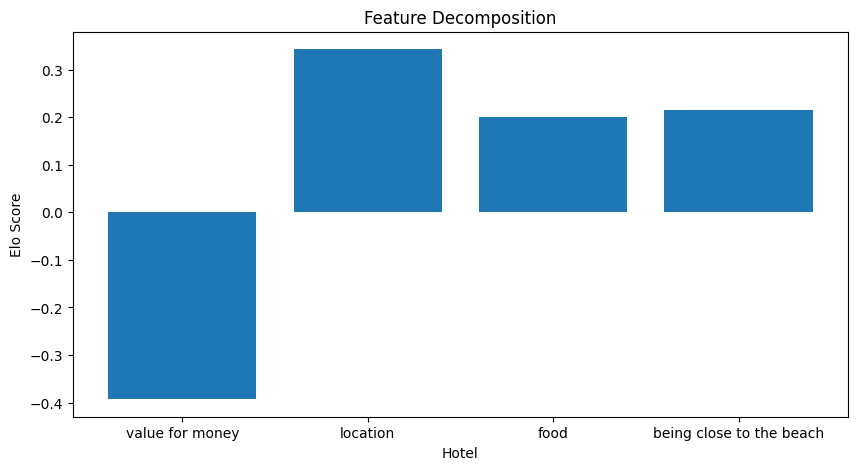

In [67]:
import matplotlib.pyplot as plt

# Extracting the hotel names and elo scores from feature_decomposition
hotel_names, elo_scores = zip(*extended_feature_decomposition)

# Creating a bar chart
plt.figure(figsize=(10, 5))
plt.bar(hotel_names, elo_scores)
plt.xlabel('Hotel')
plt.ylabel('Elo Score')
plt.title('Feature Decomposition')
plt.show()

This is bad news. 

The nonsensical ranking is not weighted less than the other. 

It is inconsistent with the previous findings, 